# 5.  Machine Learning with SKlearn 1

In [16]:
#Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
from sklearn.linear_model import LinearRegression
import random

# 5.1 The basic progression of building a model in Python with sklearn

**Do not worry about mathematics and modeling specifics. Try to identify the different steps in the modeling process.**

### Step 1 : Load the dataset

Data you feed to scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_observations, n_features]`. Numpy arrays are the most common used type.
- **n_observations:**   The number of observations: each observations is an item to process (e.g. classify).
  An observation can be a row in a dataset, a document, a picture, a sound, a video, 
  or whatever you can describe with a fixed set of quantitative traits.
  
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. 

In scikit-learn you can find a number of small datasets. These are handy to test scikit learn with, because we can skip the tedious parts of downloading, reading, parsing, and cleaning these text/CSV files. You can find a list of available datasets in scikit-learn at: http://scikit-learn.org/stable/datasets/#toy-datasets.

For example, scikit-learn has a very straightforward set of data on iris species (flowers). The data consist of
the following:

- Features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm
  

- Target classes to predict (type of iris species):
  1. Iris Setosa (class 0)
  2. Iris Versicolour (class 1)
  3. Iris Virginica (class 2)
  
  <img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 25%;"/>

Now we will make our first model. Based on sepal and petal width & length of an iris, we will try to predict the type of iris species.

In [17]:
#import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

#convert the bunch object to a dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris["data"])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
#Check shape of data
print('Number of observations: ' + str(iris_df.shape[0]))
print('Number of variables: ' + str(iris_df.shape[1]))

Number of observations: 150
Number of variables: 5


In [18]:
#check first 5 rows
iris_df.head()
#target : variable we want to predict
#sepal length & width + petal length & width: predictors

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
#target: 0 -> 2 (resp.)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Step 2: Data exploration

#### Look at the target variable

Data exploration is an important part in the modeling process. It's important to get to know your dataset.

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
#we have 50 observations of each iris species
iris_df.target.value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

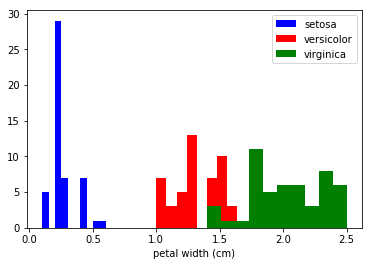

In [11]:
#histogram of petal width across species
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

In [20]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


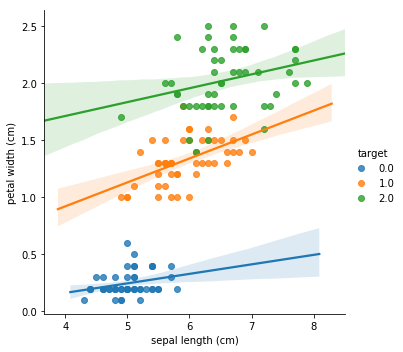

In [22]:
sns.lmplot(x="sepal length (cm)",
               y="petal width (cm)",
               hue="target",
               data=iris_df)

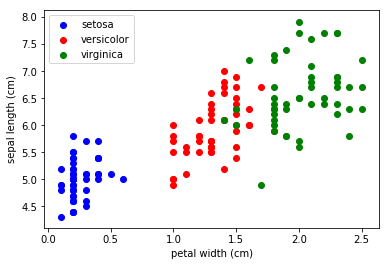

In [12]:
#scatterplot of petal width vs sepal for all species
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

##### Small exercise: can you make the preceding two plots in cleaner by using Seaborn? 

#### Looking at variable interrelations using scatterplot matrices

Instead of looking at the data one plot at a time, a common tool that analysts use is called the **scatterplot matrix**.

Scatterplot matrices show scatter plots between all features in the data set, as well as histograms to show the distribution of each feature.

##### Using Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ef1e0b8>,
      dtype=object)

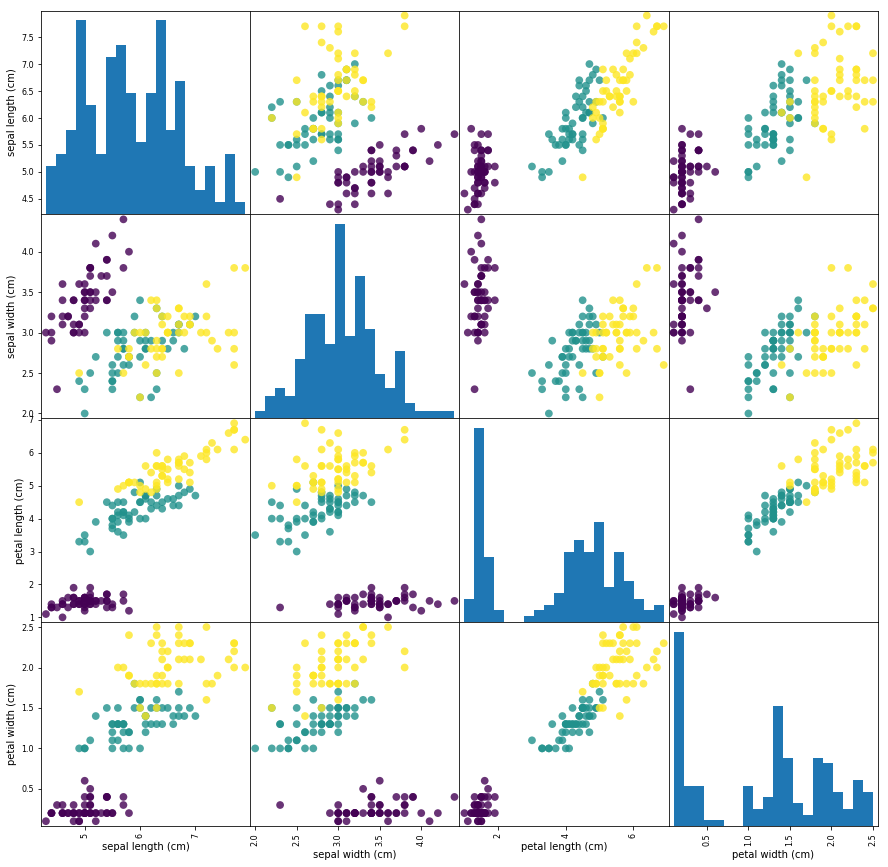

In [23]:
#split predictors / target variable for input arguments scatter matrix
predictors = iris_df.drop(['target'], axis = 1)
target = iris_df['target']

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(predictors, c=target, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)

##### Using Seaborn (prettier and easier!)

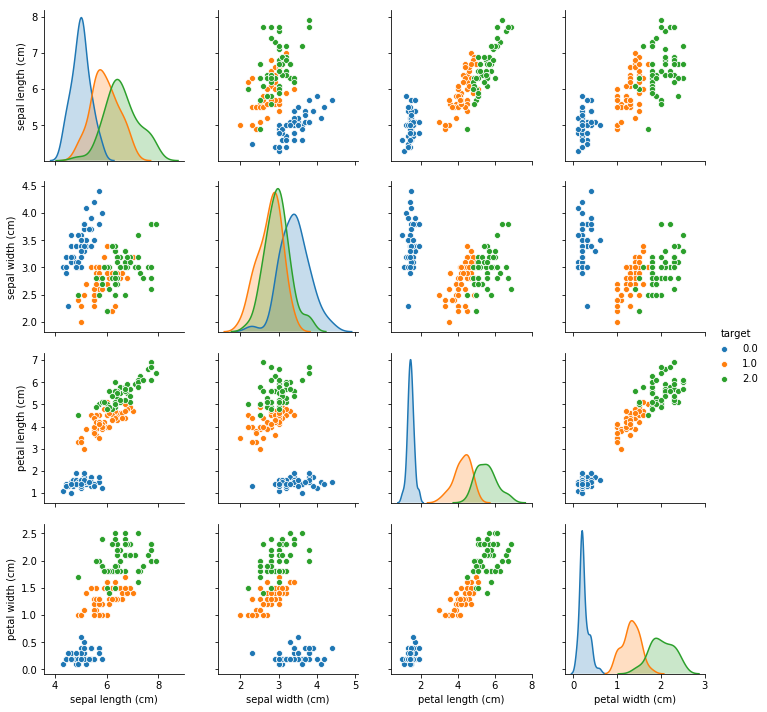

In [24]:
vars = iris_df.columns[:-1] #which variables to investigate (all predictors)
import seaborn as sns
sns.pairplot(iris_df, hue='target', vars = vars)

### Step 3: Transforming data to Numpy array

As soon as you start making "real" calculations using your data, it is best to change the way the data is stored and use Numpy arrays/matrices instead of Pandas dataframes

In [25]:
#convert dataframe to numpy array
iris_np = np.array(iris_df)

In [26]:
#check if iris_np is now a numpy array
type(iris_np)

numpy.ndarray

In [27]:
iris_np

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

** Next we split the dataset into the dependent (Y) and independent (X) variables **

In [28]:
#make seperate objects for predictors / target
X = iris_np[:,:-1]
y = iris_np[:,4].astype(int)

#we can think of X as matric with dimension M x N, with M observations and N features
#we can think of Y as a vector with M targets

In [29]:
print('type of X :' + str(type(X)))
print('type of y :' + str(type(y)))

print('shape of X :' + str(X.shape))
print('shape of y :' + str(y.shape))

type of X :<class 'numpy.ndarray'>
type of y :<class 'numpy.ndarray'>
shape of X :(150, 4)
shape of y :(150,)


### Step 4: Making training and test (and validation) sets

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a training set that the learning algorithm uses to fit the model
2. a test set to evaluate the generalization performance of the model

<img src="figures/train_test_split_matrix.svg" width="50%">

Thinking about how machine learning is normally performed, the idea of a train/test split makes sense. Real world systems train on the data they have, and as other data comes in (from customers, sensors, or other sources) the classifier that was trained must predict on fundamentally *new* data. We can simulate this during training using a train/test split - the test data is a simulation of "future data" which will come into the system during production. 

Specifically for iris, the 150 labels in iris are sorted, which means that if we split the data using a proportional split, this will result in fudamentally altered class distributions. For instance, if we'd perform a common 2/3 training data and 1/3 test data split, our training dataset will only consists of flower classes 0 and 1 (Setosa and Versicolor), and our test set will only contain samples with class label 2 (Virginica flowers).

Under the assumption that all samples are independent of each other (in with contrast time series data), we want to **randomly shuffle the dataset before we split the dataset** as illustrated above.

Now we need to split the data into training and testing. Luckily, this is a common pattern in machine learning and scikit-learn has a pre-built function to split data into training and testing sets for you. The ``train_test_split`` function from the ``model_selection`` module does that for us. Here, we use 75% of the data as training, and 25% testing. There are no hard and fast rules for deciding on the percentage of train / test data. **The most important thing is to fairly evaluate your system on data it *has not* seen during training!**

By using the stratify parameter, we made sure the distribution of iris species was the same across train and test

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

In [32]:
print('All:', np.bincount(y) / float(len(y)) * 100)
print('Training:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('Test:', np.bincount(y_test) / float(len(y_test)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.92857143 33.03571429 33.03571429]
Test: [31.57894737 34.21052632 34.21052632]


##### Footnote on validation sets 

When building a single model it suffices to use a training and test set, however when tuning meta-parameters and testing different types of models it is recommended to also use a validation set, which is a completely separate set of data that you use to actually validate how good you can expect your model to perform. 

This is an additional check to make sure you are not overfitting your test set. 

### Step 5: Making the model

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). 

<img src="figures/supervised_workflow.svg" width="40%">

The example used in this notebook is the LogisticRegression, but you will see that virtually all other models use the exact same logic. 

In [34]:
from sklearn.linear_model import LogisticRegression

#### Instantiate the estimator object.

In [35]:
#classifier = LogisticRegression()
classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', max_iter=200)

#### Fit the model to the data

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [36]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)


We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

#### Making predictions with the trained model

In [39]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [40]:
print(prediction)
print(y_test)

[0 2 0 1 0 2 1 1 1 0 1 1 0 0 2 0 2 2 2 2 0 1 1 0 1 1 0 2 2 1 1 2 2 1 2 2 0
 0]
[0 2 0 1 0 2 1 1 1 0 1 1 0 0 2 0 2 2 2 2 0 1 1 0 1 1 0 2 2 1 1 2 2 1 2 2 0
 0]


Imagine i have an iris in my garden and i don't know what species it is. I have information of the petal and sepal width & length. I will feed this information to my trained model which will predict its species

In [41]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(classifier.predict(X_new))

[0]


### Step 6: Evaluate model performance

We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [45]:
prediction == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [42]:
np.mean(prediction == y_test)

1.0

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [43]:
classifier.score(X_test, y_test)

1.0

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [44]:
classifier.score(X_train, y_train)

0.9732142857142857

We can also visualize the correct and failed predictions

In [46]:
print('Samples correctly classified:')
correct_idx = np.where(prediction == y_test)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(prediction != y_test)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]

Samples incorrectly classified:
[]


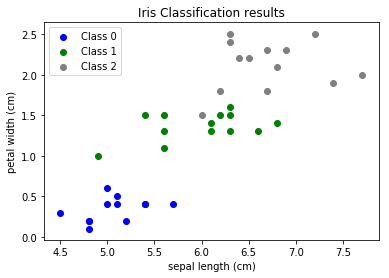

In [47]:
# Plot two variables

#which variables
var1 = 0
var2 = 3

colors = ["blue", "green", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, var1], X_test[idx, var2], color=color, label="Class %s" % str(n))

plt.scatter(X_test[incorrect_idx, var1], X_test[incorrect_idx, var2], color="red")

plt.xlabel(iris_df.columns[var1])
plt.ylabel(iris_df.columns[var2])
plt.legend(loc=0)
plt.title("Iris Classification results")
plt.show()

We can see that the errors occur in the area where green (class 1) and gray (class 2) overlap. This gives us insight about what features to add - any feature which helps separate class 1 and class 2 should improve classifier performance.


More model evaluation methods: http://scikit-learn.org/stable/modules/model_evaluation.html